## Imports

In [241]:
import numpy as np
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt
from Functions import *
from gaussfft import gaussfft

## Exercises

### Exercise 1: Difference operators

In [242]:
# Usage of simple difference operator

def deltax():
    kernel = np.zeros((3, 3))
    kernel[1,0] = 0.5
    kernel[1,1] = 0
    kernel[1,2] = -0.5
    return kernel
    
def deltay():
    kernel = np.zeros((3, 3))
    kernel[0,1] = 0.5
    kernel[1,1] = 0
    kernel[2,1] = -0.5
    return kernel

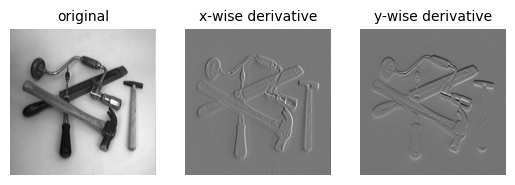

Size original:  (256, 256)
Size x-wise derivative:  (254, 254)
Size y-wise derivative:  (254, 254)


In [243]:
tools = np.load("Images-npy/few256.npy")
dxtools = convolve2d(tools, deltax(), "valid")
dytools = convolve2d(tools, deltay(), "valid")

f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(1, 3, 1)
showgrey(tools, False)
a1.title.set_text("original")


a2 = f.add_subplot(1, 3, 2)
showgrey(dxtools, False)
a2.title.set_text("x-wise derivative")
a3 = f.add_subplot(1, 3, 3)
showgrey(dytools, False)
a3.title.set_text("y-wise derivative")

plt.show()

print("Size original: ", np.shape(tools))
print("Size x-wise derivative: ", np.shape(dxtools))
print("Size y-wise derivative: ", np.shape(dytools))

### Exercise 2: Point–wise thresholding of gradient magnitudes

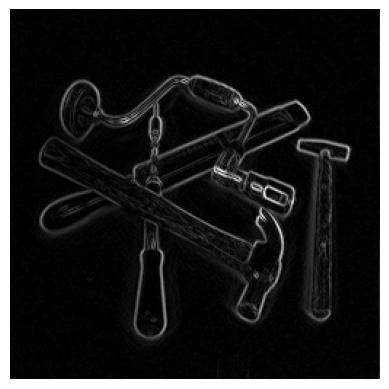

Histogram:  [56360  4461  1601   907   607   342   121    63    40    14]
Bins:  [  0.          12.26234072  24.52468145  36.78702217  49.04936289
  61.31170361  73.57404434  85.83638506  98.09872578 110.3610665
 122.62340723]


In [244]:
gradmagntools = np.sqrt(dxtools**2 + dytools**2)

showgrey(gradmagntools)

hist, bins = np.histogram(gradmagntools, bins = 10)

print("Histogram: ", hist)
print("Bins: ", bins)

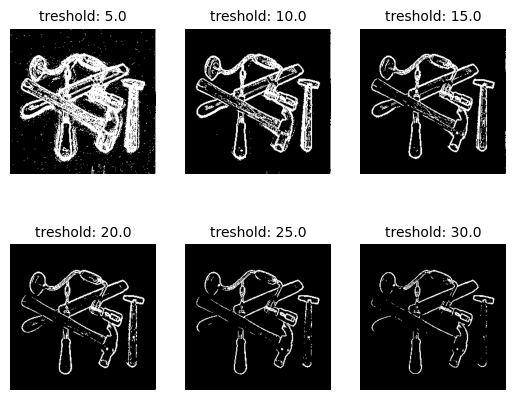

In [245]:
threshold_values = [5.0, 10.0, 15.0, 20.0, 25.0, 30.0]
f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes', titlesize=10, )

for i,v in enumerate(threshold_values):
    a = f.add_subplot(2, 3, i + 1)
    showgrey((gradmagntools > v).astype(int), False)
    a.set_title(f"treshold: {v}")

In [246]:
def Lv(inpic, shape = "same"):
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    return np.sqrt(Lx**2 + Ly**2)

(256, 256) (256, 256) (256, 256)


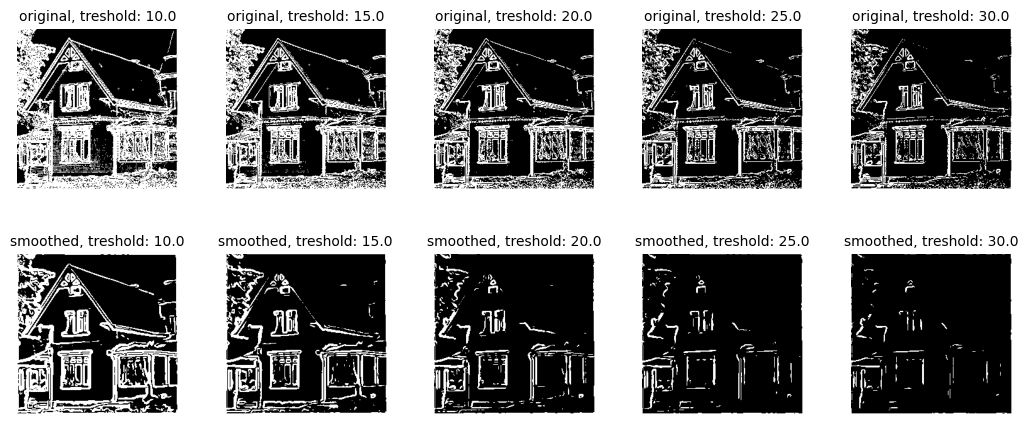

In [247]:
godthem = np.load("Images-npy/godthem256.npy")

smooted_godthem = discgaussfft(godthem, 2)

threshold_values = [10.0, 15.0, 20.0, 25.0, 30.0]
f = plt.figure(figsize=(13,5))
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes', titlesize=10)

for i,v in enumerate(threshold_values):
    a = f.add_subplot(2, 5, i + 1)
    showgrey((Lv(godthem) > v).astype(int), False)
    a.set_title(f"original, treshold: {v}")
    
for i,v in enumerate(threshold_values):
    a = f.add_subplot(2, 5, 6 + i)
    showgrey((Lv(smooted_godthem) > v).astype(int), False)
    a.set_title(f"smoothed, treshold: {v}")

### Exercise 4: Computing differential geometry descriptors

In [248]:
def dxmask():
    kernel = np.zeros((5, 5))
    kernel[2,1] = 0.5
    kernel[2,2] = 0
    kernel[2,3] = -0.5
    return kernel
    
def dymask():
    kernel = np.zeros((5, 5))
    kernel[1,2] = 0.5
    kernel[2,2] = 0
    kernel[3,2] = -0.5
    return kernel

def dxxmask():
    kernel = np.zeros((5, 5))
    kernel[2,1] = 1
    kernel[2,2] = -2
    kernel[2,3] = 1
    return kernel
    
def dyymask():
    kernel = np.zeros((5, 5))
    kernel[1,2] = 1
    kernel[2,2] = -2
    kernel[3,2] = 1
    return kernel
  
def dxymask():
    return convolve2d(dxmask(), dymask(), mode="same")
    
def dxxxmask():
    return convolve2d(dxmask(), dxxmask(), mode="same")

def dyyymask():
    return convolve2d(dymask(), dyymask(), mode="same")
    
def dxxymask():
    return convolve2d(dxxmask(), dymask(), mode="same")

def dxyymask():
    return convolve2d(dxmask(), dyymask(), mode="same")

def Lvvtilde(inpic, shape = "same"):
    Lx = convolve2d(inpic, dxmask(), shape)
    Ly = convolve2d(inpic, dymask(), shape)
    Lxx = convolve2d(inpic, dxxmask(), shape)
    Lyy = convolve2d(inpic, dyymask(), shape)
    Lxy = convolve2d(inpic, dxymask(), shape)
    return (Lx*Lx*Lxx) + (2*Lx*Ly*Lxy) + (Ly*Ly*Lyy)

def Lvvvtilde(inpic, shape = "same"):
    Lx = convolve2d(inpic, dxmask(), shape)
    Ly = convolve2d(inpic, dyymask(), shape)
    Lxxx = convolve2d(inpic, dxxxmask(), shape)
    Lyyy = convolve2d(inpic, dyyymask(), shape)
    Lxxy = convolve2d(inpic, dxxymask(), shape)
    Lxyy = convolve2d(inpic, dxyymask(), shape)
    return (Lx*Lx*Lx*Lxxx) + (3*Lx*Lx*Ly*Lxxy) + (3*Lx*Ly*Ly*Lxyy) + (Ly*Ly*Ly*Lyyy)

[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
print(convolve2d(x**3, dxxxmask(), "valid"))
print(convolve2d(x**3, dxxmask(), "valid"))
print(convolve2d(x**2*y, dxxymask(), "valid"))

[[6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]]
[[-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]


(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


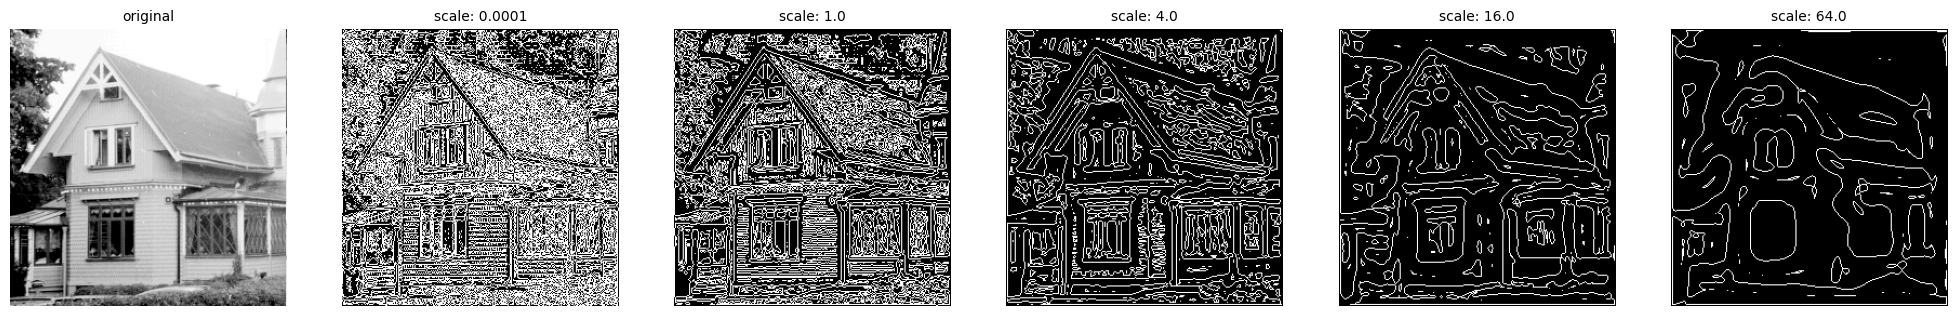

In [249]:
house = np.load("Images-npy/godthem256.npy")
scale_values = [0.0001, 1.0, 4.0, 16.0, 64.0]

f = plt.figure(figsize=(25,5))
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(1, 6, 1)
showgrey(house, False)
a1.set_title("original")

for i, scale in enumerate(scale_values):
    a = f.add_subplot(1, 6, 2+i)
    showgrey(contour(Lvvtilde(discgaussfft(house, scale ), "same")), False)
    a.set_title(f"scale: {scale}")
    
plt.show()

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


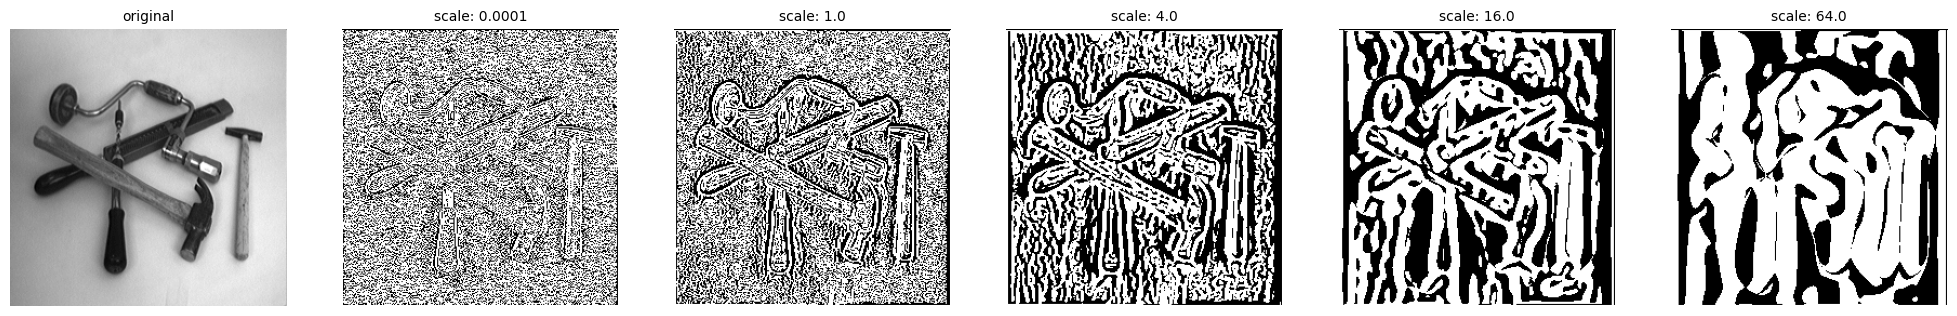

In [250]:
tools = np.load("Images-npy/few256.npy")

scale_values = [0.0001, 1.0, 4.0, 16.0, 64.0]

f = plt.figure(figsize=(25,5))
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(1, 6, 1)
showgrey(tools, False)
a1.set_title("original")

for i, scale in enumerate(scale_values):
    a = f.add_subplot(1, 6, 2+i)
    showgrey((Lvvvtilde(discgaussfft(tools, scale), "same")<0).astype(int), False)
    a.set_title(f"scale: {scale}")
    
plt.show()

### Exercise 5: Extraction of edge segments

In [251]:
def extractedge(inpic, scale, threshold, shape):

    smooted_inpic = discgaussfft(inpic, scale)
    
    Lvvt = Lvvtilde(smooted_inpic)
    Lvvvt = Lvvvtilde(smooted_inpic)
    curves = zerocrosscurves(Lvvt, Lvvvt < 0)
    
    if threshold is not None:
        curves = thresholdcurves(curves, Lv(smooted_inpic) > threshold)
        
    return curves


Scale:  4.0  Threshold:  7
(256, 256) (256, 256) (256, 256)


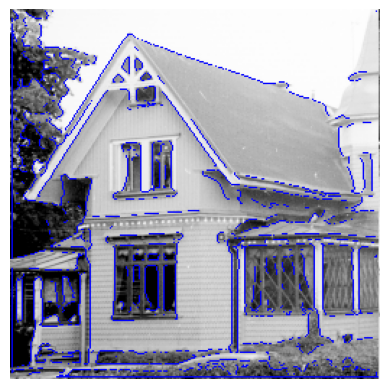

In [252]:
scale_values = [0.0001, 1.0, 4.0, 16.0, 64.0]

# For 0.0001: Textures are recognized as edges. High threshold (e.g. 30) prevents this, but also worsens edge recognition. 
# For 1.0: Still recognizes some textures e.g. in the trees. Works sufficient with medium threshold (e.g. 10). 
# For 4.0: Works good in general, best with medium/low threshold (e.g. 7). 
# For 16.0: Even without threshold not all edges can be recognized. 
# For 64.0: Even without threshold the recognized edges are incomplete and distorted. 

scale = scale_values[2]
threshold = 7

print("")
print("Scale: ", scale, " Threshold: ", threshold)
edgecurves = extractedge(house, scale, threshold, "same")
overlaycurves(house, edgecurves)


Scale:  4.0  Threshold:  8
(256, 256) (256, 256) (256, 256)


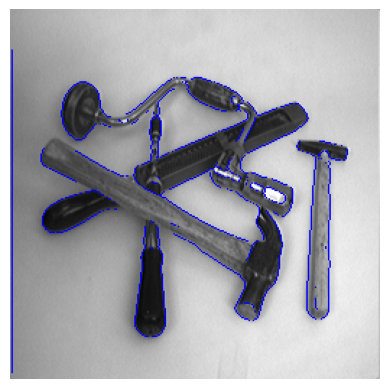

In [253]:
scale_values = [0.0001, 1.0, 4.0, 16.0, 64.0]

# Scale 4.0 with threshold of 8.0 gives best results

scale = scale_values[2]
threshold = 8

print("")
print("Scale: ", scale, " Threshold: ", threshold)
edgecurves = extractedge(tools, scale, threshold, "same")
overlaycurves(tools, edgecurves)

### Exercise 6: Hough Transform

In [254]:
def houghline(curves, magnitude, nrho, ntheta, threshold, nlines, verbose = 0, acc_function = "uniform"):
    
    # Allocate accumulator space
    accumulator = np.zeros((ntheta, nrho))
    
    # Define a coordinate system in the accumulator space    
    theta_max = np.pi/2
    theta_values = np.linspace(-theta_max, theta_max, num=ntheta)
    
    ny, nx = magnitude.shape
    rho_max = np.hypot(nx, ny)
    rho_values = np.linspace(-rho_max, rho_max, nrho) 
    drho = rho_values[1] - rho_values[0]
    
    if verbose > 1:
        print("Rho acc values: ")
        for (j, r) in enumerate(rho_values):
            print("Index: ", j, " -- Rho: ", r)
            
        print("Theta acc values: ")
        for (j, t) in enumerate(theta_values):
            print("Index: ", j, " -- Theta: ", t)
        
    # Loop over all the edge points
    (Y, X) = curves
    
    if verbose > 1:
        print("X: ", X)
        print("Y: ", Y)
    
    npoints = len(X)
    for i in range(npoints):
        x = X[i]
        y = Y[i]
        if verbose > 1: ("Curr x:", x, " -- Curr y: ", y)
        
        # Check if valid point with respect to threshold
        if magnitude[y, x] < threshold: 
            if verbose > 2: print("Rejected for threshold")
            continue
            
        # Loop over a set of theta values
        for theta_index, theta in enumerate(theta_values):
            
            # Compute rho for each theta value
            rho = (x*np.cos(theta)) + (y*np.sin(theta))
            if verbose > 1: ("Rho value: ", rho)
            
            # Compute index values in the accumulator space
            rho_index = int(np.round((rho - rho_values[0]) / drho))
            if verbose > 1: ("rho index: ", rho_index, "  --- value_at_index: ", rho_values[rho_index])
            
            # Update the accumulator
            if acc_function == "uniform":
                accumulator[theta_index, rho_index] += 1
            elif acc_function == "linear":
                accumulator[theta_index, rho_index] += magnitude[y, x]
            elif acc_function == "log":
                accumulator[theta_index, rho_index] += np.log(1 + magnitude[y, x])
            else: raise ("Invalid accumulator function!")
                
    # Extract local maxima from the accumulator
    pos, value, _ = locmax8(accumulator)
    
    if verbose > 1:
        print("Maximum positions with corresponding values: ")
        for p, v in zip(pos, value):
            print("Position: ", p, " -- Value: ", v)
    
    # Limit the number of responses if necessary
    if nlines > len(value):
        nlines = len(value)
    
    indexvector = np.argsort(value)[-nlines:]
    pos = pos[indexvector]
    
    if verbose > 1: print("Position of nline largest maxima: ", pos)

    # Compute a line for each one of the strongest responses in the accumulator
    linepar = []
    for idx in range(nlines):
        thetaidxacc = int(pos[idx, 1]) # Error in assignment - swap indices
        rhoidxacc = int(pos[idx, 0])

        theta = theta_values[thetaidxacc]
        rho = rho_values[rhoidxacc]
        linepar.append((rho, theta))
    
    
    # Overlay these curves on the gradient magnitude image
    if verbose > 0:
        plt.figure()
        plt.imshow(accumulator.T, origin="lower", aspect="auto")
        plt.title("Hough accumulator")
        plt.ylabel("rho index")
        plt.xlabel("theta index")
        plt.colorbar()
    
    # Return the output data [linepar, acc]
    return (linepar, accumulator)

In [255]:
# Verbose parameter values: 0 == silent; 1 == partial results; 2 == additional debugging information

def houghedgeline(pic, scale, gradmagnthreshold, nrho, ntheta, nlines, verbose, acc_function = "uniform"):
    
    # Detect edges using extractedge()
    curves = extractedge(pic, scale, gradmagnthreshold, "same")
    
    if verbose > 0:
        plt.figure()
        plt.title("Detected Edges")
        overlaycurves(pic, curves)
        plt.show()
    
    # Perform Huff transform using houghline()
    smoothed_pic = discgaussfft(pic, scale)
    gradient = Lv(smoothed_pic)
    (linepar, acc) = houghline(curves, gradient, nrho, ntheta, gradmagnthreshold, nlines, verbose, acc_function)
    
    # Visualisation
    if verbose > 0:
        ny, nx = pic.shape

        plt.figure()
        showgrey(pic, False)
        plt.title("Lines overlaid on image")

        for (rho, theta) in linepar:
            L = max(nx, ny) * 2  
            
            x0 = rho * np.cos(theta)
            y0 = rho * np.sin(theta)
            
            dx = -np.sin(theta) * L
            dy = np.cos(theta) * L
            
            plt.plot([x0 - dx, x0, x0 + dx], [y0 - dy, y0, y0 + dy], 'r-')

        plt.xlim([0, nx])
        plt.ylim([ny, 0]) 
    
    return (linepar, acc)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
(64, 64) (64, 64) (64, 64)


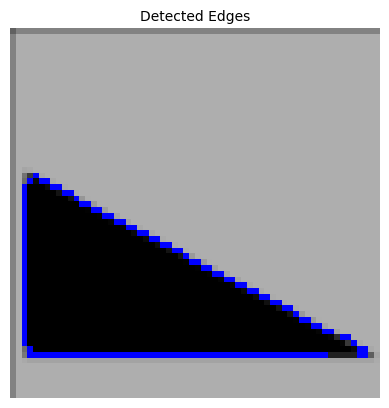

(64, 64) (64, 64) (64, 64)
Rho acc values: 
Index:  0  -- Rho:  -90.50966799187809
Index:  1  -- Rho:  -89.90425215246754
Index:  2  -- Rho:  -89.29883631305698
Index:  3  -- Rho:  -88.69342047364643
Index:  4  -- Rho:  -88.08800463423587
Index:  5  -- Rho:  -87.4825887948253
Index:  6  -- Rho:  -86.87717295541475
Index:  7  -- Rho:  -86.2717571160042
Index:  8  -- Rho:  -85.66634127659364
Index:  9  -- Rho:  -85.06092543718309
Index:  10  -- Rho:  -84.45550959777253
Index:  11  -- Rho:  -83.85009375836198
Index:  12  -- Rho:  -83.24467791895142
Index:  13  -- Rho:  -82.63926207954087
Index:  14  -- Rho:  -82.03384624013032
Index:  15  -- Rho:  -81.42843040071975
Index:  16  -- Rho:  -80.8230145613092
Index:  17  -- Rho:  -80.21759872189864
Index:  18  -- Rho:  -79.61218288248809
Index:  19  -- Rho:  -79.00676704307753
Index:  20  -- Rho:  -78.40135120366698
Index:  21  -- Rho:  -77.79593536425642
Index:  22  -- Rho:  -77.19051952484587
Index:  23  -- Rho:  -76.58510368543531
Index:  2

([(np.float64(2.724371277347501), np.float64(0.015866629563584977)),
  (np.float64(-20.88684645966417), np.float64(-1.0947974398873521)),
  (np.float64(-56.000965145476414), np.float64(-1.5707963267948966)),
  (np.float64(56.0009651454764), np.float64(1.5707963267948966))],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 300)))

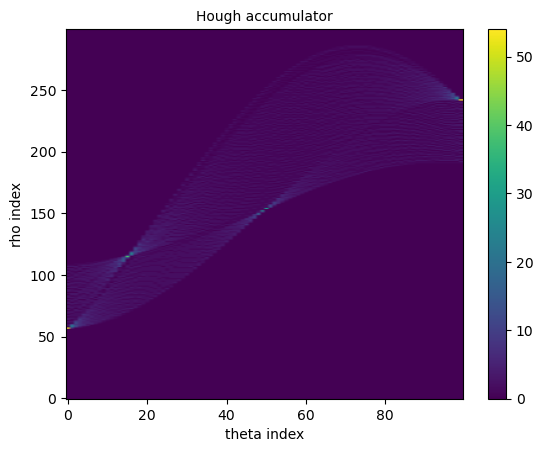

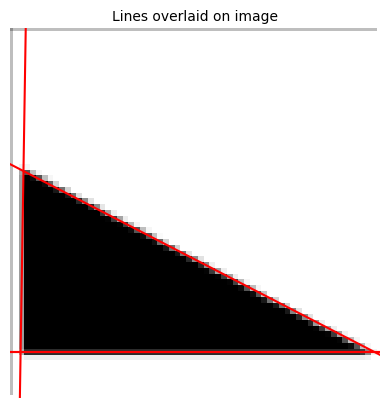

In [256]:
testimage1 = np.load("Images-npy/triangle128.npy")
smalltest1 = binsubsample(testimage1)

houghedgeline(smalltest1, 2.0, 3.0, 300, 100, 4, 2)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
(64, 64) (64, 64) (64, 64)


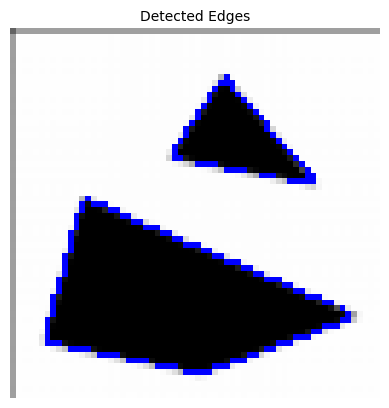

(64, 64) (64, 64) (64, 64)


([(np.float64(25.01523487212711), np.float64(-0.6505318121069773)),
  (np.float64(16.82843073215824), np.float64(0.2062661843266027)),
  (np.float64(35.02132882097794), np.float64(0.5553320347254687)),
  (np.float64(-50.48529219647472), np.float64(-1.348663512904709)),
  (np.float64(-15.009140923276263), np.float64(-1.348663512904709)),
  (np.float64(-53.214226909797674), np.float64(-1.4121300311590483)),
  (np.float64(-17.73807563659922), np.float64(-1.4121300311590483)),
  (np.float64(22.286300158804153), np.float64(-0.7139983303613165)),
  (np.float64(19.557365445481196), np.float64(0.26973270258094195)),
  (np.float64(66.85890047641244), np.float64(1.2217304763960306)),
  (np.float64(-23.195945063245148), np.float64(-1.189997217268861)),
  (np.float64(-21.376655254363172), np.float64(-1.1582639581416914))],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        

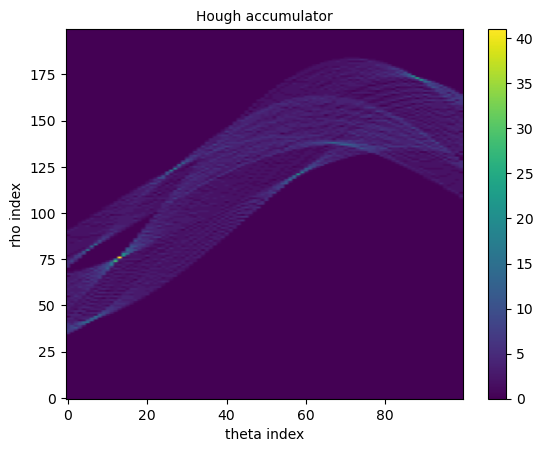

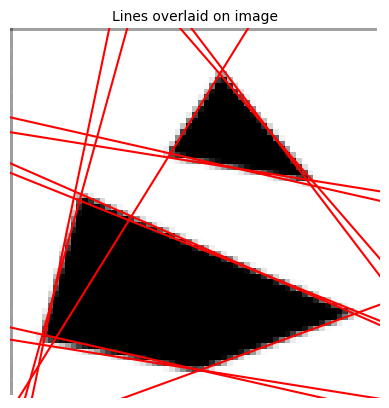

In [257]:
testimage2 = np.load("Images-npy/houghtest256.npy")
smalltest2 = binsubsample(binsubsample(testimage2))

houghedgeline(smalltest2, 1.0, 3.0, 200, 100, 12, 1)

(128, 128) (128, 128) (128, 128)


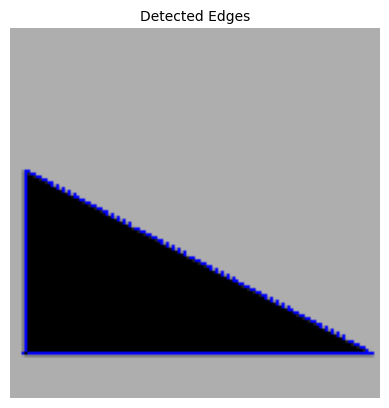

(128, 128) (128, 128) (128, 128)


([(np.float64(4.083142916926818), np.float64(-0.007893448878366183)),
  (np.float64(5.897873102227635), np.float64(0.007893448878366405)),
  (np.float64(-42.192476808243924), np.float64(-1.0971893940929176)),
  (np.float64(-40.37774662294311), np.float64(-1.081402496336185)),
  (np.float64(-112.05958894232526), np.float64(-1.5707963267948966)),
  (np.float64(112.05958894232523), np.float64(1.5707963267948966))],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(200, 400)))

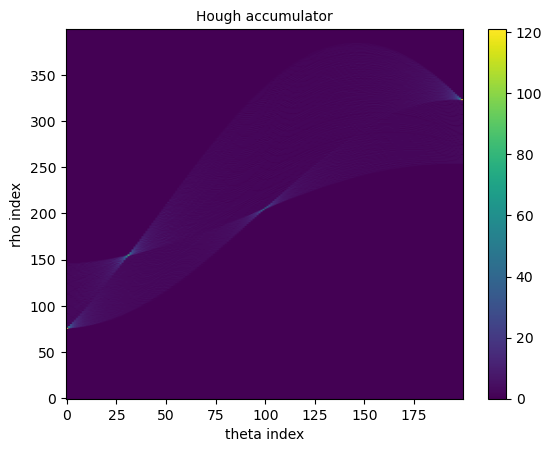

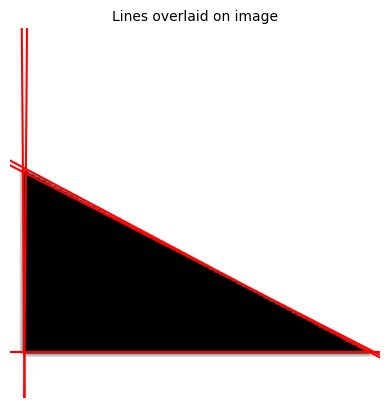

In [258]:
houghedgeline(testimage1, 0.0, 2.0, 400, 200, 6, 1)

(256, 256) (256, 256) (256, 256)


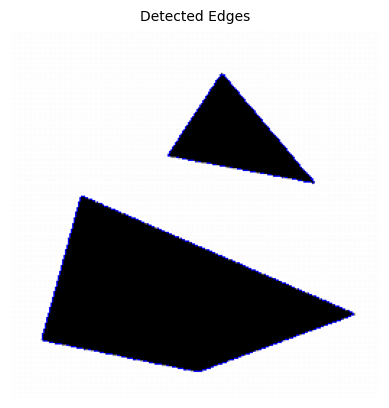

(256, 256) (256, 256) (256, 256)


([(np.float64(69.01740569280332), np.float64(0.2193849618428625)),
  (np.float64(-71.4390690504456), np.float64(-1.4128391542680354)),
  (np.float64(-64.17407897751895), np.float64(-1.3777375603731774)),
  (np.float64(139.24564306442784), np.float64(0.5879516977388719)),
  (np.float64(-207.05221707841008), np.float64(-1.3777375603731774)),
  (np.float64(93.2340392692256), np.float64(-0.693256479423446)),
  (np.float64(267.5938010194656), np.float64(1.219780387846316)),
  (np.float64(78.70405912337225), np.float64(0.2720373526851496)),
  (np.float64(-88.39071255394117), np.float64(-1.1671279970040294)),
  (np.float64(-83.54738583865668), np.float64(-1.1495772000566002))],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(180, 300)))

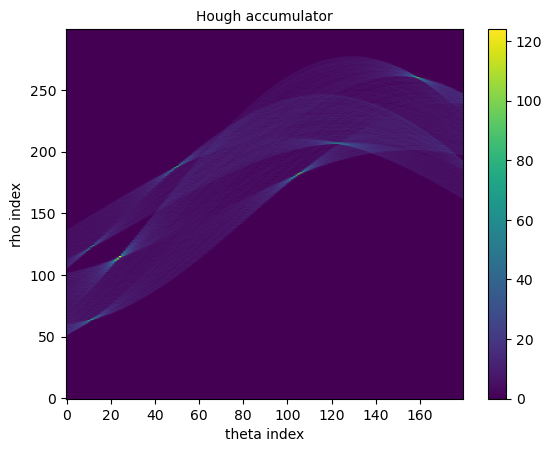

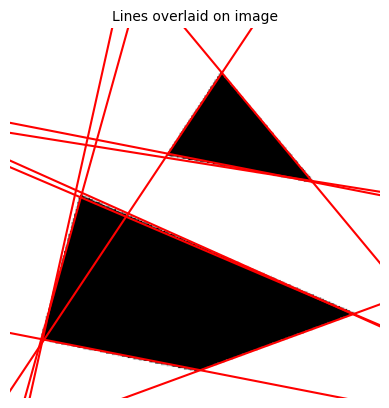

In [259]:
testimage3 = np.load("Images-npy/houghtest256.npy")
houghedgeline(testimage3, 2.0, 2.0, 300, 180, 10, 1)

(256, 256) (256, 256) (256, 256)


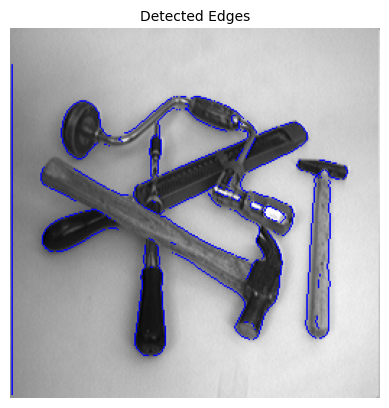

(256, 256) (256, 256) (256, 256)


([(np.float64(158.61894992556557), np.float64(1.1320264031091711)),
  (np.float64(93.2340392692256), np.float64(-0.06142778931600157)),
  (np.float64(-59.330752262234455), np.float64(-1.0442724183720262)),
  (np.float64(100.49902934215226), np.float64(-0.02632619542114356)),
  (np.float64(112.60734613036334), np.float64(0.13163097710571758)),
  (np.float64(6.0541583941055706), np.float64(0.02632619542114334)),
  (np.float64(134.40231634914335), np.float64(1.167127997004029)),
  (np.float64(216.738870508979), np.float64(0.06142778931600135)),
  (np.float64(221.58219722426344), np.float64(0.008775398473714446)),
  (np.float64(-1.2108316788211368), np.float64(-0.008775398473714668))],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(180, 300)))

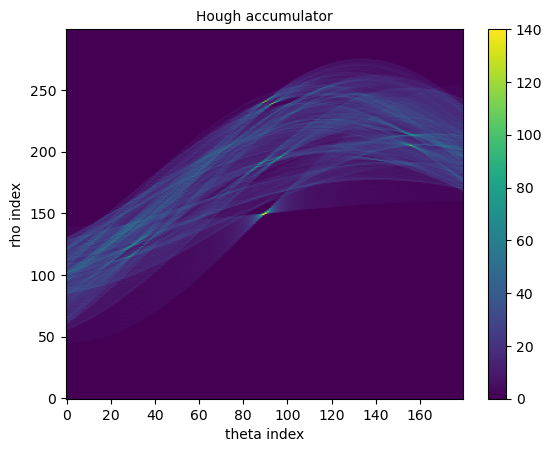

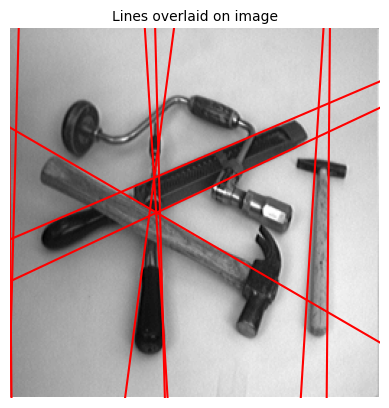

In [260]:
testimage4 = np.load("Images-npy/few256.npy")
houghedgeline(testimage4, 5.0, 7.0, 300, 180, 10, 1)

(256, 256) (256, 256) (256, 256)


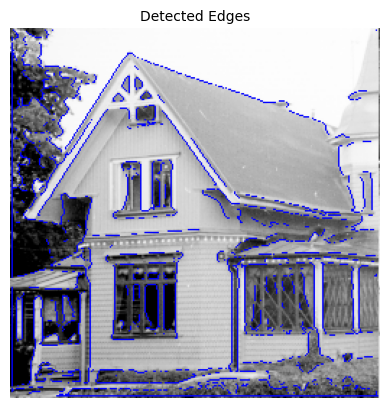

(256, 256) (256, 256) (256, 256)


([(np.float64(9.981016019154481), np.float64(-1.2373311847937454)),
  (np.float64(77.12603287528458), np.float64(0.5704009007914426)),
  (np.float64(162.41835158442285), np.float64(0.02632619542114334)),
  (np.float64(93.4586045429919), np.float64(-0.043876992368572676)),
  (np.float64(86.19968380178864), np.float64(0.5879516977388719)),
  (np.float64(245.89594010826028), np.float64(1.5707963267948966)),
  (np.float64(55.34927065167483), np.float64(-0.605502494686301)),
  (np.float64(-236.82228918175622), np.float64(-1.5707963267948966)),
  (np.float64(236.82228918175616), np.float64(1.5707963267948966)),
  (np.float64(53.53454046637398), np.float64(-0.008775398473714668)),
  (np.float64(249.52540047886185), np.float64(1.5707963267948966)),
  (np.float64(24.498857501560963), np.float64(0.043876992368572454)),
  (np.float64(158.78889121382116), np.float64(0.008775398473714446)),
  (np.float64(256.7843212200651), np.float64(1.5532455298474672)),
  (np.float64(49.90508009577235), np.float

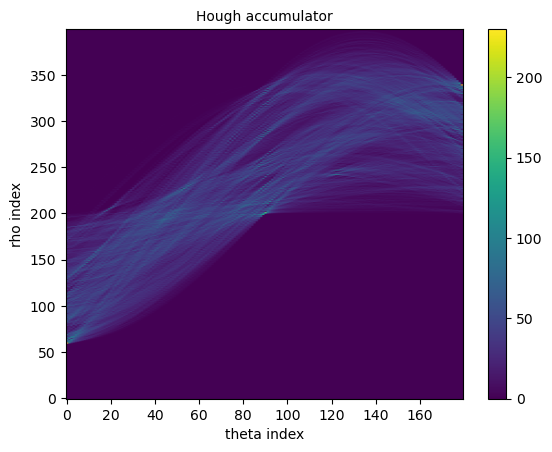

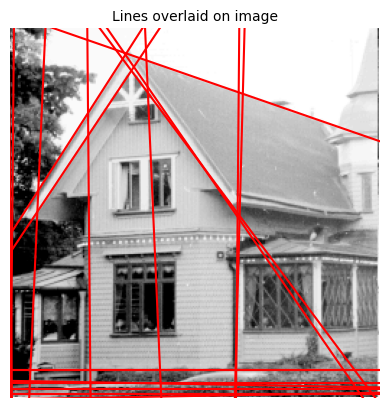

In [261]:
testimage5 = np.load("Images-npy/godthem256.npy")
houghedgeline(testimage5, 4.0, 7.0, 400, 180, 20, 1)

(256, 256) (256, 256) (256, 256)


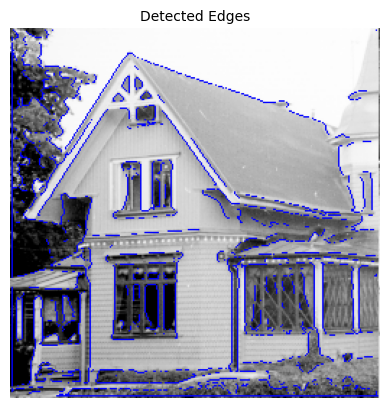

(256, 256) (256, 256) (256, 256)


([(np.float64(111.60590639600002), np.float64(-0.008775398473714668)),
  (np.float64(31.757778242764232), np.float64(0.07897858626343046)),
  (np.float64(122.49428750780493), np.float64(0.043876992368572454)),
  (np.float64(93.4586045429919), np.float64(-0.043876992368572676)),
  (np.float64(40.83142916926829), np.float64(0.11408018015828847)),
  (np.float64(118.86482713720329), np.float64(0.02632619542114334)),
  (np.float64(-0.9073650926504229), np.float64(-0.07897858626343068)),
  (np.float64(-4.5368254632520575), np.float64(-0.043876992368572676)),
  (np.float64(13.610476389756116), np.float64(-0.008775398473714668)),
  (np.float64(17.239936760357693), np.float64(0.008775398473714446)),
  (np.float64(-245.89594010826028), np.float64(-1.5356947329000386)),
  (np.float64(106.1617158400976), np.float64(-0.043876992368572676)),
  (np.float64(28.128317872162597), np.float64(0.06142778931600135)),
  (np.float64(20.869397130959328), np.float64(0.02632619542114334)),
  (np.float64(24.49885

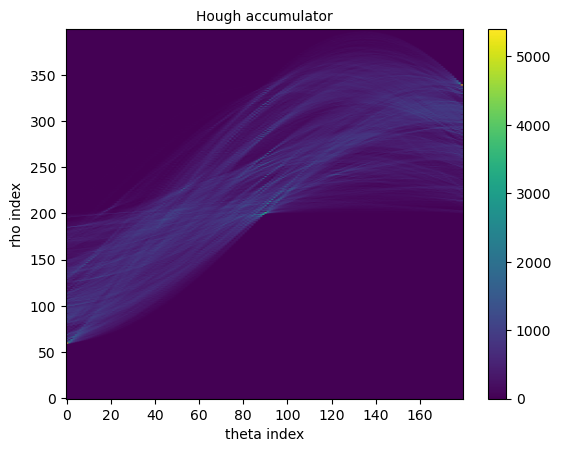

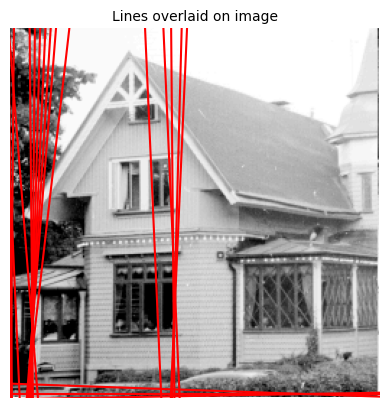

In [262]:
houghedgeline(testimage5, 4.0, 7.0, 400, 180, 20, 1, acc_function="linear")

(256, 256) (256, 256) (256, 256)


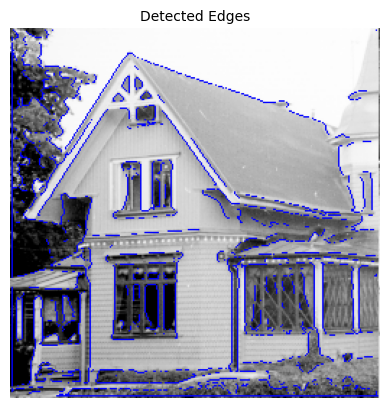

(256, 256) (256, 256) (256, 256)


([(np.float64(-155.15943084321958), np.float64(-1.5707963267948966)),
  (np.float64(155.15943084321958), np.float64(1.5707963267948966)),
  (np.float64(162.41835158442285), np.float64(0.02632619542114334)),
  (np.float64(245.89594010826028), np.float64(1.5532455298474672)),
  (np.float64(-240.45174955235785), np.float64(-1.5181439359526094)),
  (np.float64(28.128317872162597), np.float64(0.06142778931600135)),
  (np.float64(93.4586045429919), np.float64(-0.043876992368572676)),
  (np.float64(236.82228918175616), np.float64(1.5707963267948966)),
  (np.float64(-236.82228918175622), np.float64(-1.5707963267948966)),
  (np.float64(53.53454046637398), np.float64(-0.008775398473714668)),
  (np.float64(20.869397130959328), np.float64(0.02632619542114334)),
  (np.float64(49.90508009577235), np.float64(-0.640604088581159)),
  (np.float64(158.78889121382116), np.float64(0.008775398473714446)),
  (np.float64(-245.89594010826028), np.float64(-1.5356947329000386)),
  (np.float64(24.498857501560963)

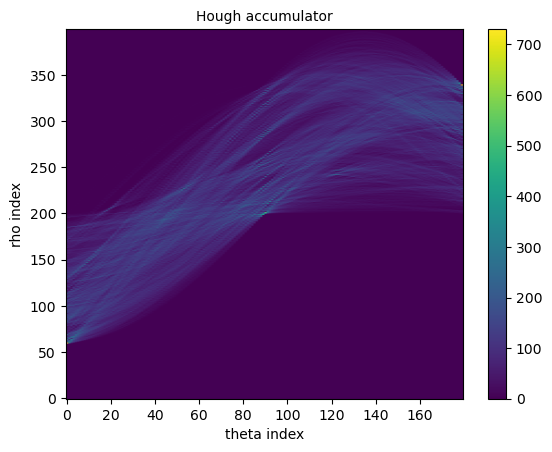

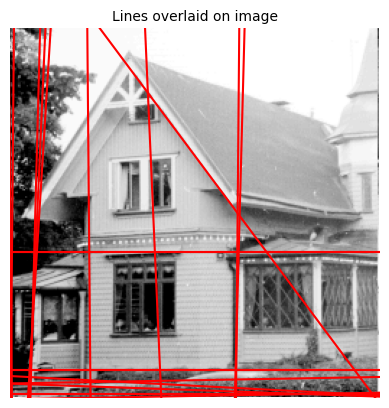

In [263]:
houghedgeline(testimage5, 4.0, 7.0, 400, 180, 20, 1, acc_function="log")
